In [1]:
from PyEMD import EMD
import pandas as pd
import numpy as np
import torch
import torch.nn
from sample_entropy import SE, FSE
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Microsoft Yahei'
plt.rcParams['axes.unicode_minus'] = False
from plot_function import line_plot
from model_train import *
from model_evaluation import *
from data_preprocessing import *

In [2]:
path = r'dau_plot_1.csv'
data = pd.read_csv(path, encoding='gbk').dropna()
data = data.iloc[0:302, :]
data.dau = data.dau.apply(lambda x: int(x))
data.iloc[127, 1] = 12026
data

,日期,dau,dau_fake
0,2022/8/1,15417,154170
1,2022/8/2,15009,150090
2,2022/8/3,15550,155500
3,2022/8/4,18791,187910
4,2022/8/5,18686,186860
...,...,...,...
297,2023/5/25,8110,81100
298,2023/5/26,8046,80460
299,2023/5/27,8566,85660
300,2023/5/28,8668,86680


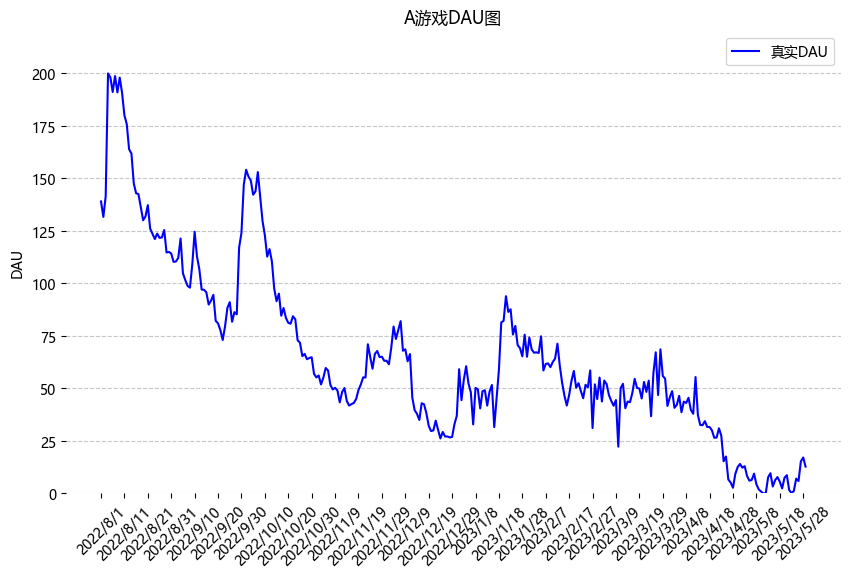

In [3]:
scaler = Scaler(feature_range=[0, 200])
scaler.fit(data, 'dau')
scaled_data = pd.DataFrame()
scaled_data['日期'] = data.日期
scaled_data['dau'] = scaler.transform(data, 'dau')

fig_size = (10, 6)
line_args = [{'x':scaled_data.日期, 'y':scaled_data.dau, 'label':'真实DAU', 'color':'blue'}]
y_lim = (0, 220)
y_label = 'DAU'
title = 'A游戏DAU图'
x_ticks = {'point_range':list(range(0, scaled_data.shape[0], 10)), 'point':scaled_data.日期.tolist()[::10], 'rotation':45}
line_plot(fig_size, line_args, y_lim, y_label, title, x_ticks=x_ticks)

In [4]:
emd = EMD()
imfs = emd(scaled_data.dau.to_numpy())
imfs

array([[-2.20362221e+01, -2.12359391e+01, -2.09240645e+01, ...,
         2.59054230e+00,  2.58277462e+00, -6.19931432e-02],
       [-6.84757239e+00, -1.46369899e+01, -8.66957416e+00, ...,
         3.52297742e+00,  4.97791678e+00,  3.36426109e+00],
       [-1.72418440e+01, -1.77925128e+01, -1.42010018e+01, ...,
         1.20057957e+00,  1.45974673e+00,  1.31106809e+00],
       [ 4.08651751e+01,  4.10382175e+01,  4.09782201e+01, ...,
         3.86981750e+00,  3.86670276e+00,  3.72849020e+00],
       [ 4.09221255e+01,  4.10772892e+01,  4.12038430e+01, ...,
        -1.12990742e+01, -1.11536555e+01, -1.09756986e+01],
       [ 1.03386301e+02,  1.03227290e+02,  1.03063214e+02, ...,
         1.53983296e+01,  1.53923388e+01,  1.54059797e+01]])

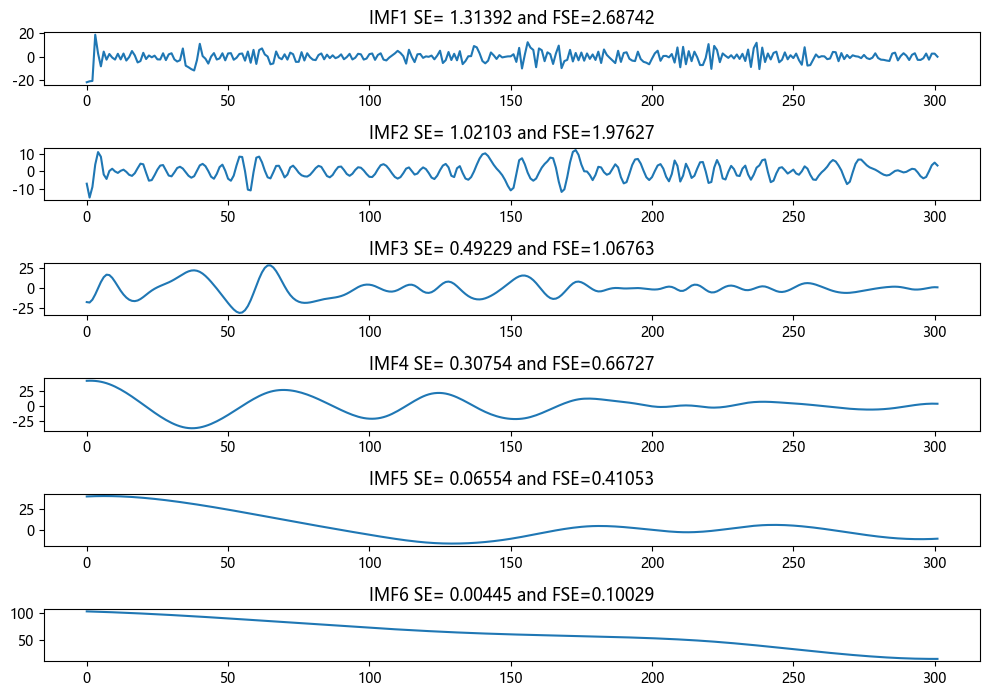

In [5]:
plt.figure(figsize=(10, 8))
se_list, fse_list = [], []

for i, imf in enumerate(imfs):
    plt.subplot(len(imfs) + 1, 1, i + 2)
    plt.plot(list(range(data.shape[0])), imf)
    se = SE(imfs[i, :].tolist())
    fse = FSE(imfs[i, :].tolist(), n=2)
    se_list.append(se)
    fse_list.append(fse)
    plt.title(f'IMF{i + 1} SE={se: .5f} and FSE={fse :.5f}')

plt.tight_layout()
plt.show()

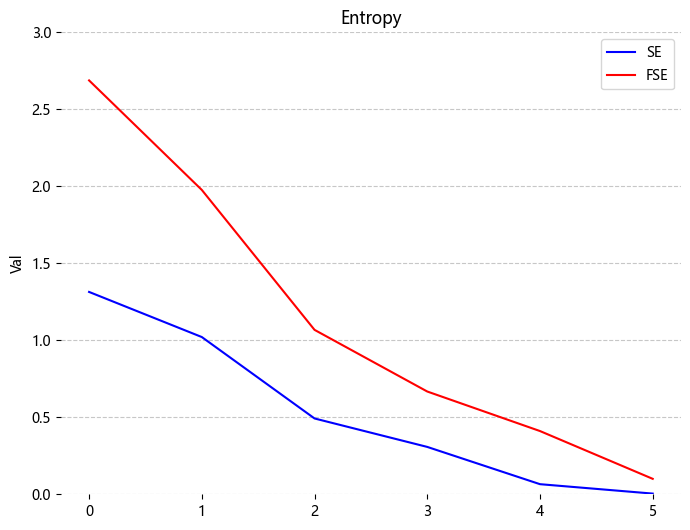

In [6]:
line_args = [{'x':list(range(len(se_list))), 'y':se_list, 'label':'SE', 'color':'blue'},
             {'x':list(range(len(fse_list))), 'y':fse_list, 'label':'FSE', 'color':'red'}]
line_plot((8,6), line_args, y_lim=(0, 3), y_label='Val', title='Entropy')

In [7]:
dataset = DauPredictionDataset(dataframe=data, sequence_length=7)
dataloader = DauPredictionDataLoader(dataset=dataset, batch_size=32)

In [8]:
dataset[0], dataset[273], dataset[294], dataset.__len__()

((tensor([[15417.],
          [15009.],
          [15550.],
          [18791.],
          [18686.],
          [18302.],
          [18721.]]),
  tensor([18291.])),
 (tensor([[8496.],
          [8399.],
          [8439.],
          [8181.],
          [8057.],
          [8075.],
          [8242.]]),
  tensor([7962.])),
 (tensor([[7813.],
          [7726.],
          [7786.],
          [8110.],
          [8046.],
          [8566.],
          [8668.]]),
  tensor([8427.])),
 295)

In [9]:
for inp, target in dataloader:
    print(inp)
    print(target)
    print(inp.shape)
    print(target.shape)

tensor([[[15417.],
         [15009.],
         [15550.],
         [18791.],
         [18686.],
         [18302.],
         [18721.]],

        [[15009.],
         [15550.],
         [18791.],
         [18686.],
         [18302.],
         [18721.],
         [18291.]],

        [[15550.],
         [18791.],
         [18686.],
         [18302.],
         [18721.],
         [18291.],
         [18680.]],

        [[18791.],
         [18686.],
         [18302.],
         [18721.],
         [18291.],
         [18680.],
         [18279.]],

        [[18686.],
         [18302.],
         [18721.],
         [18291.],
         [18680.],
         [18279.],
         [17686.]],

        [[18302.],
         [18721.],
         [18291.],
         [18680.],
         [18279.],
         [17686.],
         [17455.]],

        [[18721.],
         [18291.],
         [18680.],
         [18279.],
         [17686.],
         [17455.],
         [16793.]],

        [[18291.],
         [18680.],
         [18279.]

Epoch [1/200], Loss: 103.1085205078125
Epoch [21/200], Loss: 35.049171447753906
Epoch [41/200], Loss: 31.95210838317871
Epoch [61/200], Loss: 29.048219680786133
Epoch [81/200], Loss: 26.722349166870117
Epoch [101/200], Loss: 25.090633392333984
Epoch [121/200], Loss: 24.12569808959961
Epoch [141/200], Loss: 23.752853393554688
Epoch [161/200], Loss: 23.44753646850586
Epoch [181/200], Loss: 23.06659507751465
RNN Model Training completed.


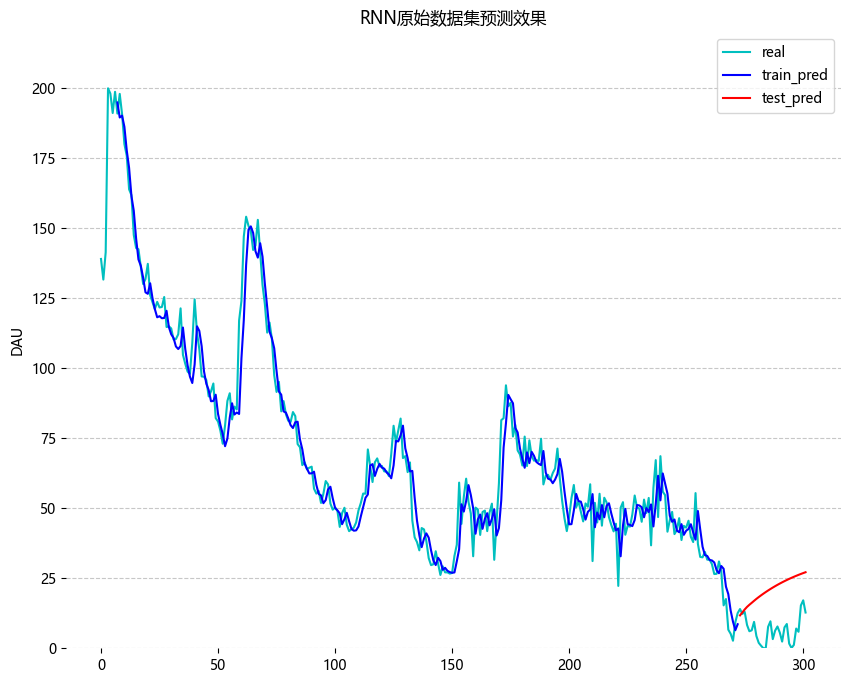

In [10]:
sequence_length = 7

# 先对数据做一个归一化处理
scaler = Scaler(feature_range=[0, 200])
scaler.fit(data, 'dau')
scaled_data = pd.DataFrame()
scaled_data['日期'] = data.日期
scaled_data['dau'] = scaler.transform(data, 'dau')

dataset = DauPredictionDataset(dataframe=scaled_data, sequence_length=sequence_length)
dataloader = DauPredictionDataLoader(dataset=dataset, batch_size=16)

# 训练RNN模型
RNN = train_rnn_model(dataloader=dataloader,
                      input_size=1,
                      hidden_size=8,
                      output_size=1,
                      num_epochs=200,
                        )

# 根据训练的模型预测出训练集的预测值，然后滚动预测测试集
train_pred, train_true = train_model_res([0, 273 - sequence_length], dataset=dataset, model=RNN, window_size=sequence_length)
test_pred = test_model(model=RNN, dataset=dataset, window_size=sequence_length, start=273 - sequence_length, end=301 - sequence_length)
line_args = [
             {'x':list(range(len(scaled_data.dau))), 'y':scaled_data.dau, 'label':'real', 'color':'c'},
             {'x':list(range(sequence_length, len(train_pred)+sequence_length)), 'y':train_pred, 'label':'train_pred', 'color':'blue'},
             {'x':list(range(273, 302)), 'y':test_pred, 'label':'test_pred', 'color':'red'}
            ]
line_plot((10,8), line_args, y_lim=(0, 220), y_label='DAU', title='RNN原始数据集预测效果')

Epoch [1/200], Loss: 53.84946823120117
Epoch [21/200], Loss: 18.28793716430664
Epoch [41/200], Loss: 11.575698852539062
Epoch [61/200], Loss: 10.2838134765625
Epoch [81/200], Loss: 0.587638258934021
Epoch [101/200], Loss: 0.685856282711029
Epoch [121/200], Loss: 0.04938611760735512
Epoch [141/200], Loss: 0.5817545652389526
Epoch [161/200], Loss: 1.8819042444229126
Epoch [181/200], Loss: 4.640504360198975
LSTM Model Training completed.


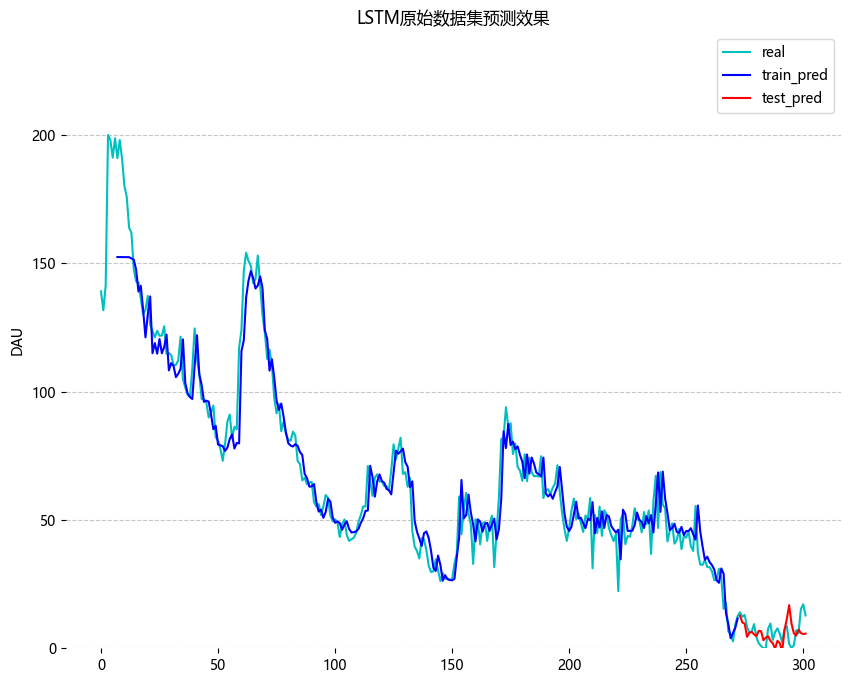

In [11]:
sequence_length = 7

# 先对数据做一个归一化处理
scaler = Scaler(feature_range=[0, 200])
scaler.fit(data, 'dau')
scaled_data = pd.DataFrame()
scaled_data['日期'] = data.日期
scaled_data['dau'] = scaler.transform(data, 'dau')

dataset = DauPredictionDataset(dataframe=scaled_data, sequence_length=sequence_length)
dataloader = DauPredictionDataLoader(dataset=dataset, batch_size=16)

# 训练LSTM模型
LSTM = train_lstm_model(dataloader=dataloader,
                      input_size=1,
                      hidden_size=32,
                      output_size=1,
                      num_epochs=200,
                      learning_rate=0.01)

# 根据训练的模型预测出训练集的预测值，然后滚动预测测试集
train_pred, train_true = train_model_res([0, 273 - sequence_length], dataset=dataset, model=LSTM, window_size=sequence_length)
test_pred = test_model(model=LSTM, dataset=dataset, window_size=sequence_length, start=273 - sequence_length, end=301-sequence_length)
line_args = [
             {'x':list(range(len(scaled_data.dau))), 'y':scaled_data.dau, 'label':'real', 'color':'c'},
             {'x':list(range(sequence_length, len(train_pred)+sequence_length)), 'y':train_pred, 'label':'train_pred', 'color':'blue'},
             {'x':list(range(273, 302)), 'y':test_pred, 'label':'test_pred', 'color':'red'}
            ]
line_plot((10,8), line_args, y_lim=(0, 240), y_label='DAU', title='LSTM原始数据集预测效果')

Epoch [1/200], Loss: 37.546451568603516
Epoch [21/200], Loss: 12.301816940307617
Epoch [41/200], Loss: 8.253495216369629
Epoch [61/200], Loss: 20.087282180786133
Epoch [81/200], Loss: 9.354813575744629
Epoch [101/200], Loss: 18.89670181274414
Epoch [121/200], Loss: 4.12964391708374
Epoch [141/200], Loss: 2.584772825241089
Epoch [161/200], Loss: 2.418501138687134
Epoch [181/200], Loss: 10.353720664978027
GRU Model Training completed.


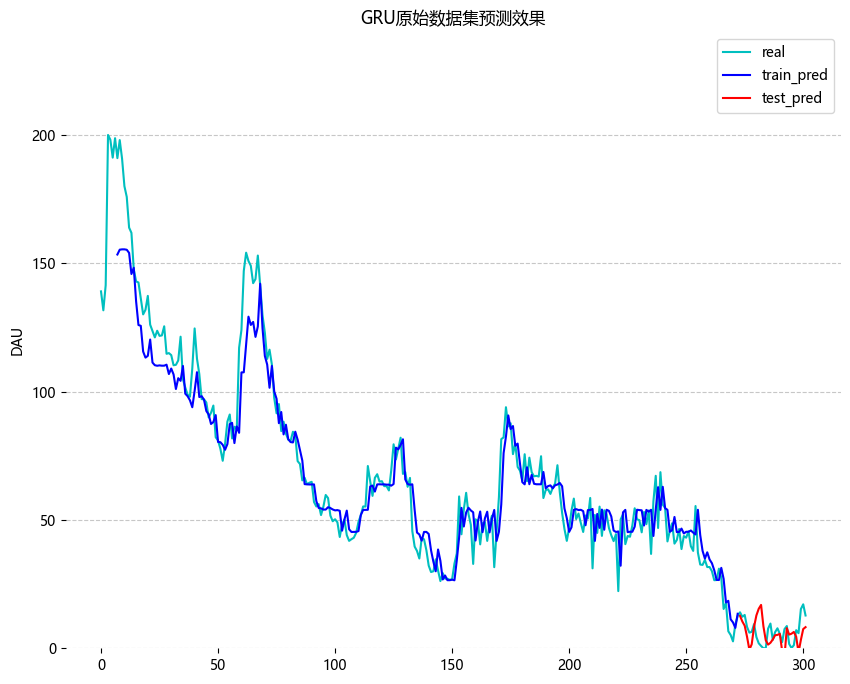

In [12]:
sequence_length = 7

# 先对数据做一个归一化处理
scaler = Scaler(feature_range=[0, 200])
scaler.fit(data, 'dau')
scaled_data = pd.DataFrame()
scaled_data['日期'] = data.日期
scaled_data['dau'] = scaler.transform(data, 'dau')

dataset = DauPredictionDataset(dataframe=scaled_data, sequence_length=sequence_length)
dataloader = DauPredictionDataLoader(dataset=dataset, batch_size=16)

# 训练GRU模型
GRU = train_gru_model(dataloader=dataloader,
                      input_size=1,
                      hidden_size=64,
                      output_size=1,
                      num_epochs=200,
                      learning_rate=0.01)

# 根据训练的模型预测出训练集的预测值，然后滚动预测测试集
train_pred, train_true = train_model_res([0, 273 - sequence_length], dataset=dataset, model=GRU, window_size=sequence_length)
test_pred = test_model(model=GRU, dataset=dataset, window_size=sequence_length, start=273 - sequence_length, end=301-sequence_length)
line_args = [
             {'x':list(range(len(scaled_data.dau))), 'y':scaled_data.dau, 'label':'real', 'color':'c'},
             {'x':list(range(sequence_length, len(train_pred)+sequence_length)), 'y':train_pred, 'label':'train_pred', 'color':'blue'},
             {'x':list(range(273, 302)), 'y':test_pred, 'label':'test_pred', 'color':'red'}
            ]
line_plot((10,8), line_args, y_lim=(0, 240), y_label='DAU', title='GRU原始数据集预测效果')

Epoch [1/200], Loss: 5.341428279876709
Epoch [21/200], Loss: 5.334320545196533
Epoch [41/200], Loss: 1.1736363172531128
Epoch [61/200], Loss: 1.1450393199920654
Epoch [81/200], Loss: 0.7113701105117798
Epoch [101/200], Loss: 0.4436100423336029
Epoch [121/200], Loss: 0.3119032084941864
Epoch [141/200], Loss: 0.8481820225715637
Epoch [161/200], Loss: 0.17929114401340485
Epoch [181/200], Loss: 0.6532635688781738
GRU Model Training completed.


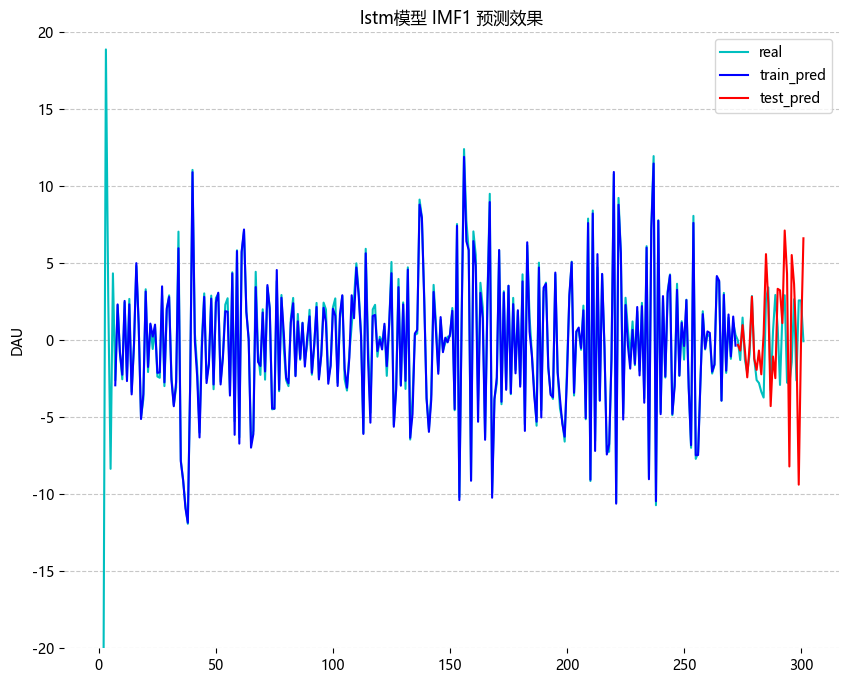

In [13]:
imf1_dataframe = pd.DataFrame()
imf1_dataframe['日期'] = scaled_data.日期
imf1_dataframe['dau'] = imfs[0, :]
ifm1_train_pred, imf1_test_pred = imf_train(imf_dataframe=imf1_dataframe, window_size=7, y_lim=(-20, 20), model_name='lstm', graph_index=1)

Epoch [1/200], Loss: 10.096624374389648
Epoch [21/200], Loss: 0.10198507457971573
Epoch [41/200], Loss: 0.10761076956987381
Epoch [61/200], Loss: 0.1100737676024437
Epoch [81/200], Loss: 0.07779673486948013
Epoch [101/200], Loss: 0.05708468332886696
Epoch [121/200], Loss: 0.04648938775062561
Epoch [141/200], Loss: 0.03469912335276604
Epoch [161/200], Loss: 0.021914681419730186
Epoch [181/200], Loss: 0.020501649007201195
GRU Model Training completed.


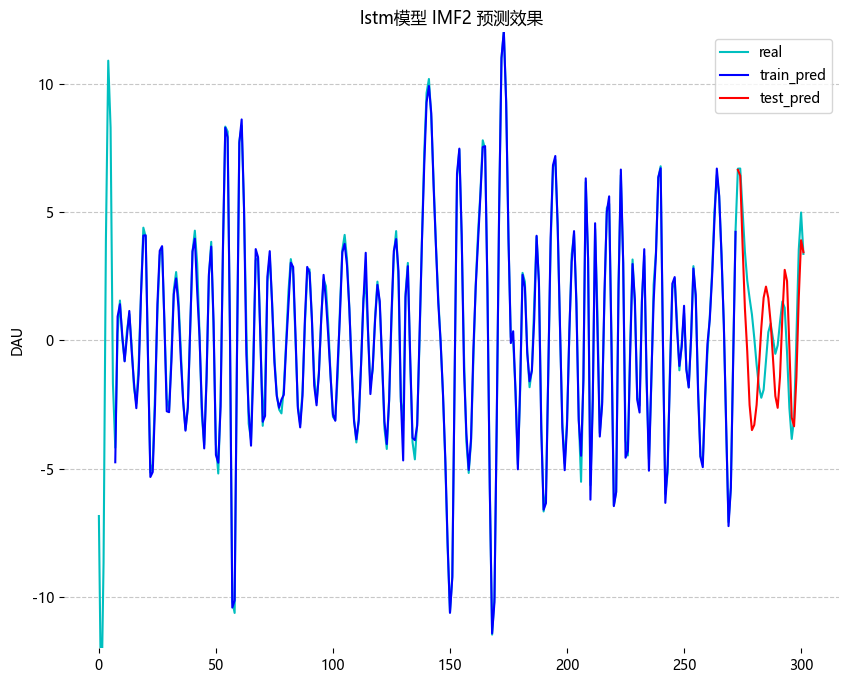

In [14]:
imf2_dataframe = pd.DataFrame()
imf2_dataframe['日期'] = scaled_data.日期
imf2_dataframe['dau'] = imfs[1, :]
ifm2_train_pred, imf2_test_pred = imf_train(imf_dataframe=imf2_dataframe, window_size=7, y_lim=(-12, 12), model_name='lstm', graph_index=2)

Epoch [1/200], Loss: 0.9428437352180481
Epoch [21/200], Loss: 0.06300105899572372
Epoch [41/200], Loss: 0.07351038604974747
Epoch [61/200], Loss: 0.021333958953619003
Epoch [81/200], Loss: 0.007370718289166689
Epoch [101/200], Loss: 0.0034514334984123707
Epoch [121/200], Loss: 0.031183673068881035
Epoch [141/200], Loss: 0.011736423708498478
Epoch [161/200], Loss: 0.006139795295894146
Epoch [181/200], Loss: 0.0032449623104184866
GRU Model Training completed.


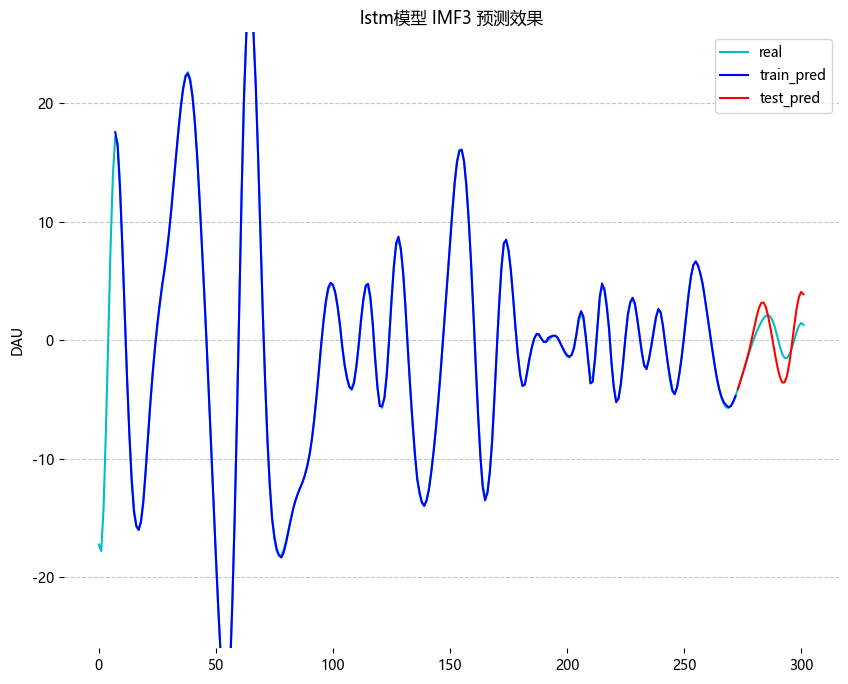

In [15]:
imf3_dataframe = pd.DataFrame()
imf3_dataframe['日期'] = scaled_data.日期
imf3_dataframe['dau'] = imfs[2, :]
ifm3_train_pred, imf3_test_pred = imf_train(imf_dataframe=imf3_dataframe, window_size=7, y_lim=(-26, 26), model_name='lstm', graph_index=3)

Epoch [1/200], Loss: 7.728042125701904
Epoch [21/200], Loss: 0.13230310380458832
Epoch [41/200], Loss: 0.03394730016589165
Epoch [61/200], Loss: 0.01419250201433897
Epoch [81/200], Loss: 0.010512903332710266
Epoch [101/200], Loss: 0.019311049953103065
Epoch [121/200], Loss: 0.002408995060250163
Epoch [141/200], Loss: 0.003488407237455249
Epoch [161/200], Loss: 0.0029853624291718006
Epoch [181/200], Loss: 0.010248682461678982
GRU Model Training completed.


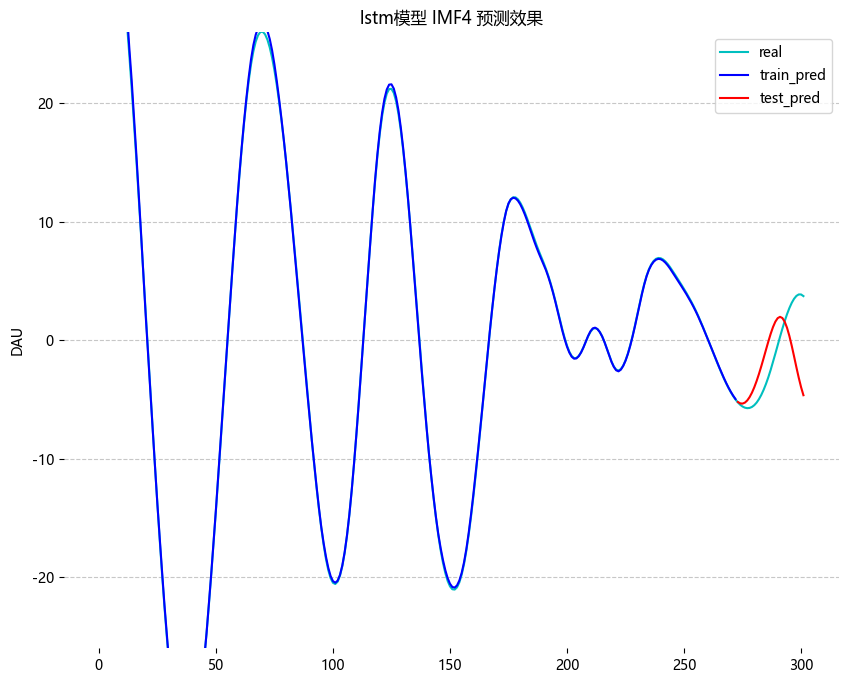

In [21]:
imf4_dataframe = pd.DataFrame()
imf4_dataframe['日期'] = scaled_data.日期
imf4_dataframe['dau'] = imfs[3, :]
ifm4_train_pred, imf4_test_pred = imf_train(imf_dataframe=imf4_dataframe, window_size=7, y_lim=(-26, 26), model_name='lstm', graph_index=4)

Epoch [1/200], Loss: 109.03669738769531
Epoch [21/200], Loss: 0.15767915546894073
Epoch [41/200], Loss: 0.03283359855413437
Epoch [61/200], Loss: 0.24599997699260712
Epoch [81/200], Loss: 0.0026565357111394405
Epoch [101/200], Loss: 0.07412886619567871
Epoch [121/200], Loss: 0.06785538047552109
Epoch [141/200], Loss: 0.010804405435919762
Epoch [161/200], Loss: 0.044790931046009064
Epoch [181/200], Loss: 0.0726643055677414
GRU Model Training completed.


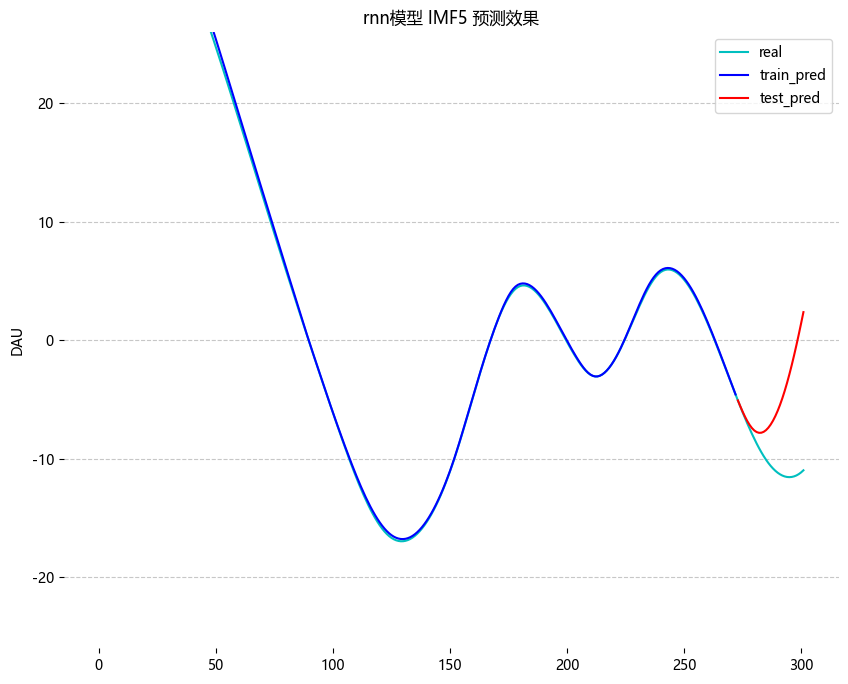

In [22]:
imf5_dataframe = pd.DataFrame()
imf5_dataframe['日期'] = scaled_data.日期
imf5_dataframe['dau'] = imfs[4, :]
ifm5_train_pred, imf5_test_pred = imf_train(imf_dataframe=imf5_dataframe, window_size=7, y_lim=(-26, 26), model_name='rnn', graph_index=5)

Epoch [1/200], Loss: 182.6750946044922
Epoch [21/200], Loss: 69.72366333007812
Epoch [41/200], Loss: 6.150908946990967
Epoch [61/200], Loss: 0.3212664723396301
Epoch [81/200], Loss: 0.07759003341197968
Epoch [101/200], Loss: 0.0223894864320755
Epoch [121/200], Loss: 0.6708202362060547
Epoch [141/200], Loss: 0.6726763844490051
Epoch [161/200], Loss: 0.05235838145017624
Epoch [181/200], Loss: 0.05722374841570854
GRU Model Training completed.


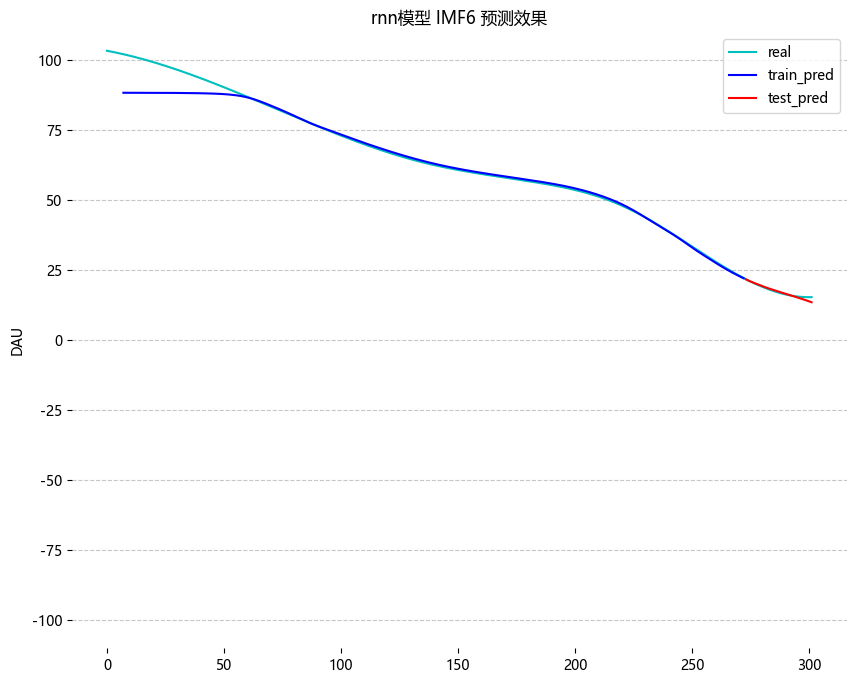

In [19]:
imf6_dataframe = pd.DataFrame()
imf6_dataframe['日期'] = scaled_data.日期
imf6_dataframe['dau'] = imfs[5, :]
ifm6_train_pred, imf6_test_pred = imf_train(imf_dataframe=imf6_dataframe, window_size=7, y_lim=(-110, 110), model_name='rnn', graph_index=6)

In [24]:
imf_train_pred = np.array(ifm1_train_pred) + np.array(ifm2_train_pred) + np.array(ifm3_train_pred) + np.array(ifm4_train_pred) + np.array(ifm5_train_pred) + np.array(ifm6_train_pred)
imf_test_pred = np.array(imf1_test_pred) + np.array(imf2_test_pred) + np.array(imf3_test_pred) + np.array(imf4_test_pred) + np.array(imf5_test_pred) + np.array(imf6_test_pred)
imf_train_pred, imf_test_pred

(array([173.13174  , 182.77603  , 176.03992  , 167.2742   , 162.78217  ,
        150.09009  , 148.26318  , 134.17595  , 130.35501  , 130.31653  ,
        124.07532  , 118.33542  , 120.31278  , 126.10958  , 115.94864  ,
        113.755516 , 112.32733  , 114.66092  , 114.072044 , 114.7384   ,
        118.90856  , 107.75267  , 107.50445  , 106.941086 , 102.611626 ,
        103.203094 , 105.61328  , 113.66876  ,  98.39001  ,  96.29056  ,
         93.70003  ,  93.71989  , 104.6816   , 119.819244 , 107.21043  ,
        100.857666 ,  92.8327   ,  92.8917   ,  92.364456 ,  86.823296 ,
         89.47508  ,  92.20723  ,  81.02026  ,  78.767395 ,  76.984146 ,
         71.56178  ,  79.225204 ,  88.17885  ,  89.78647  ,  80.651215 ,
         85.63991  ,  84.54897  , 116.46585  , 123.73638  , 148.08456  ,
        155.44786  , 150.66217  , 150.15097  , 142.12599  , 144.04045  ,
        153.67229  , 142.12602  , 131.36227  , 124.13932  , 113.62161  ,
        118.18662  , 112.08633  ,  98.73343  ,  92.

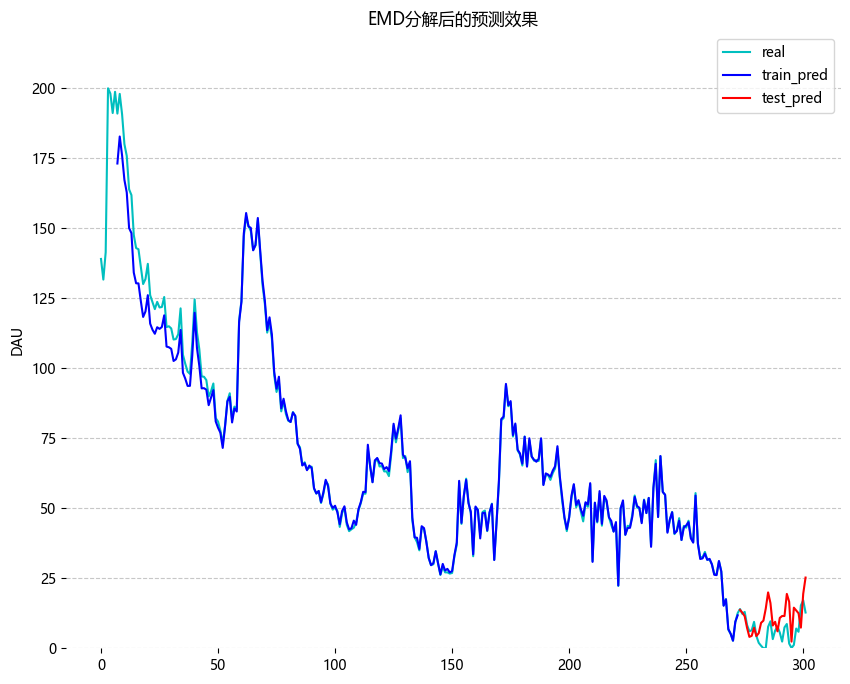

In [25]:
line_args = [
             {'x':list(range(len(scaled_data.dau))), 'y':scaled_data.dau, 'label':'real', 'color':'c'},
             {'x':list(range(sequence_length, len(imf_train_pred)+sequence_length)), 'y':imf_train_pred, 'label':'train_pred', 'color':'blue'},
             {'x':list(range(273, 302)), 'y':imf_test_pred, 'label':'test_pred', 'color':'red'}
            ]
line_plot((10,8), line_args, y_lim=(0, 220), y_label='DAU', title='EMD分解后的预测效果')